In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mall = pd.read_csv('Mall_Customers.csv')
sns.set_style('whitegrid')

<h1>Exploratory Data Analysis</h1>

In [3]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall.drop('CustomerID', axis=1, inplace=True)
mall.columns = ['gender', 'age', 'annual_income', 'spending_score']

In [5]:
mall.shape

(200, 4)

We have a small dataset with 4 features. Let's start to explore with categorical data.

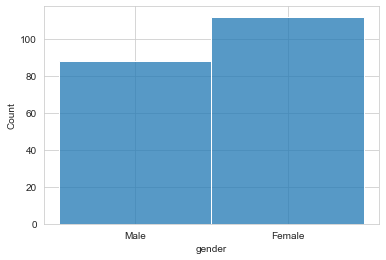

In [6]:
sns.histplot(data = mall, x = 'gender')

Viewing numeric data in terms of gender

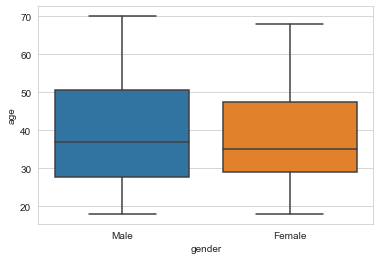

In [7]:
sns.boxplot(data = mall, x = 'gender', y = 'age')

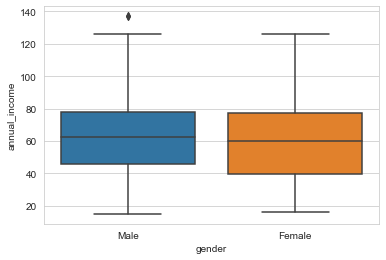

In [8]:
sns.boxplot(data = mall, x = 'gender', y = 'annual_income')

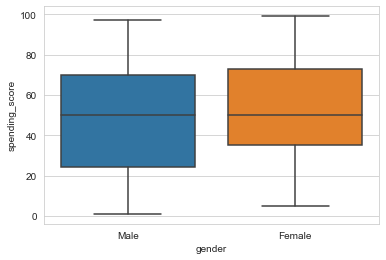

In [9]:
sns.boxplot(data = mall, x = 'gender', y = 'spending_score')

We got pretty similar results for values of this feature. Let's look at numeric data from the perspective of age groups.

In [10]:
mall_age_grouped = mall.copy()
for sample in range(mall_age_grouped.shape[0]):
    if mall_age_grouped.iloc[sample,1] >= 18 and mall_age_grouped.iloc[sample,1] <= 24:
        mall_age_grouped.iloc[sample,1] = 0
    elif mall_age_grouped.iloc[sample,1] >= 25 and mall_age_grouped.iloc[sample,1] <= 34:
        mall_age_grouped.iloc[sample,1] = 1
    elif mall_age_grouped.iloc[sample,1] >= 35 and mall_age_grouped.iloc[sample,1]<= 44:
        mall_age_grouped.iloc[sample,1] = 2
    elif mall_age_grouped.iloc[sample,1] >= 45 and mall_age_grouped.iloc[sample,1]<= 54:
        mall_age_grouped.iloc[sample,1] = 3
    elif mall_age_grouped.iloc[sample,1] >= 55 and mall_age_grouped.iloc[sample,1]<= 64:
        mall_age_grouped.iloc[sample,1] = 4
    elif mall_age_grouped.iloc[sample,1] >= 65 and mall_age_grouped.iloc[sample,1]<= 70:
        mall_age_grouped.iloc[sample,1] = 5

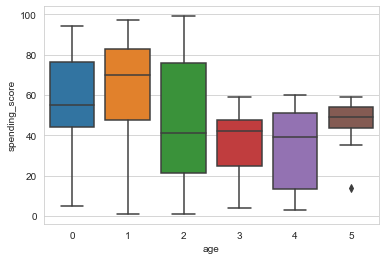

In [11]:
sns.boxplot(data = mall_age_grouped, x='age', y='spending_score')

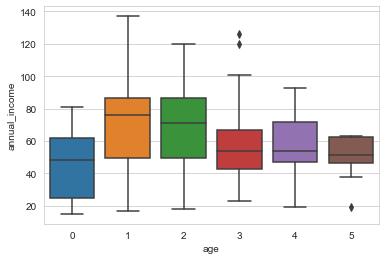

In [12]:
sns.boxplot(data = mall_age_grouped, x='age', y='annual_income')

Visualizations and statistics for numeric data:

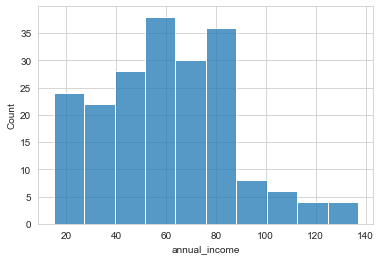

In [13]:
sns.histplot(data = mall, x='annual_income')

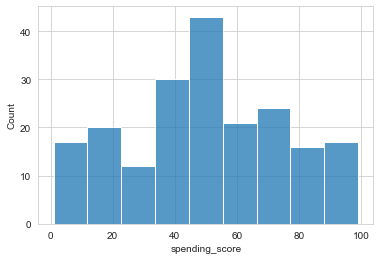

In [14]:
sns.histplot(data = mall, x='spending_score')

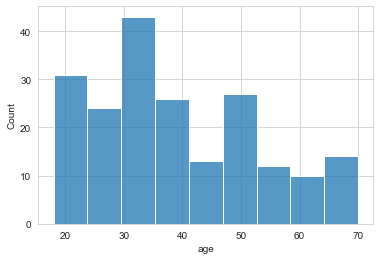

In [15]:
sns.histplot(data = mall, x='age')

Spending scores minimum and maximum:

In [16]:
mall[mall.spending_score == mall.spending_score.min()]

,gender,age,annual_income,spending_score
156,Male,37,78,1
158,Male,34,78,1


In [17]:
mall[mall.spending_score == mall.spending_score.max()]

,gender,age,annual_income,spending_score
11,Female,35,19,99


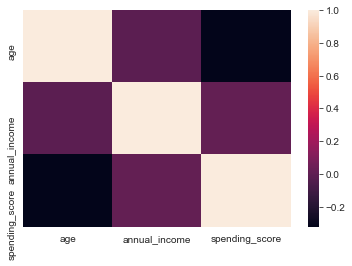

In [18]:
corr = mall.corr()
sns.heatmap(corr)

Features are badly correlated.

<h2>Preprocessing</h2>

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mall.gender = le.fit_transform(mall.gender)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
featuresToScale = ['age','annual_income','spending_score']
featuresScaled = pd.DataFrame(scaler.fit_transform(mall[featuresToScale]), columns=featuresToScale)
mall[featuresToScale] = featuresScaled

<h2>Unsupervised Learning</h2>

<h3>Principal Component Analysis</h3>

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(mall)

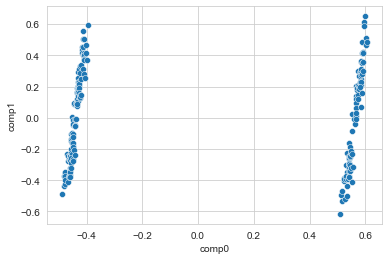

In [22]:
comp_data_pca = pd.DataFrame(X_pca, columns=['comp0','comp1'])
sns.scatterplot(data = comp_data_pca, x = 'comp0', y = 'comp1')

In [23]:
X_pca.shape

(200, 2)

In [24]:
pca.components_

array([[ 0.99699028,  0.05229534,  0.02946581, -0.04906465],
       [-0.07087494,  0.72547595, -0.02842334, -0.68399818]])

Text(0, 0.5, 'Principal components')

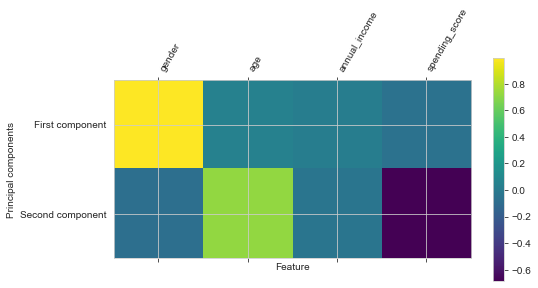

In [25]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(mall.columns)), mall.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

<h3>k-Means Clustering</h3>

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(mall)
cluster = kmeans.labels_
cluster

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0])

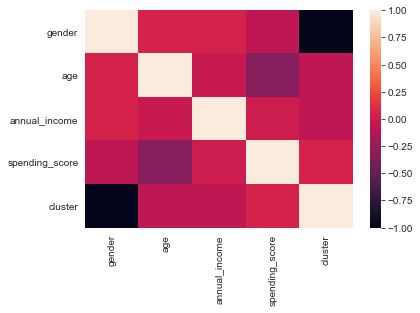

In [27]:
mall_clustered = pd.DataFrame(pd.concat([mall,pd.Series(cluster)], axis=1))
mall_clustered.columns = ['gender', 'age', 'annual_income', 'spending_score', 'cluster']
sns.heatmap(mall_clustered.corr())

Our learned clusters seem to correlate with annual_income more than any original features.

<h3>NMF</h3>

In [28]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, max_iter=500, random_state=0)
X_nmf = nmf.fit_transform(mall)

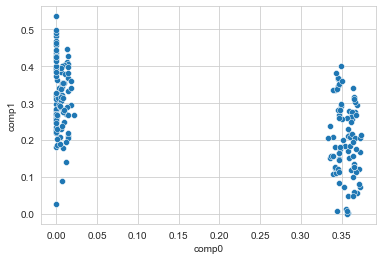

In [29]:
comp_data_nmf = pd.DataFrame(X_nmf, columns=['comp0','comp1'])
sns.scatterplot(data = comp_data_nmf, x = 'comp0', y = 'comp1')

Text(0, 0.5, 'Principal components')

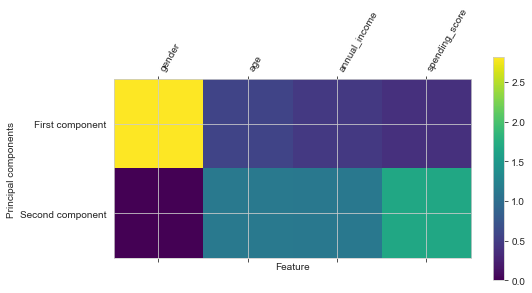

In [30]:
plt.matshow(nmf.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(mall.columns)), mall.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

<h3>Manifold Learning (t-SNE)</h3>

In [31]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(mall)

It's not about components now; manifold learning algorithms focus on finding a representation of the original data that is two-dimensional and preserve distances between data points

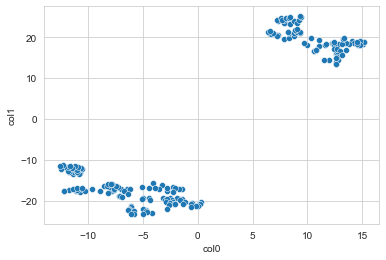

In [32]:
tsne_data = pd.DataFrame(X_tsne, columns = ['col0','col1'])
sns.scatterplot(data = tsne_data, x = 'col0', y = 'col1')